In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

file_path = 'C:/Users/ACER/Downloads/archive (13)/IMDb Movies India.csv'

# Try reading the file with different encodings
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='iso-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='cp1252')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [21]:


missing_values = df.isnull()

missing_counts = df.isnull().sum()

print("Counts of missing values:")
print(missing_counts)


Counts of missing values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [22]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [23]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(df)
result

,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


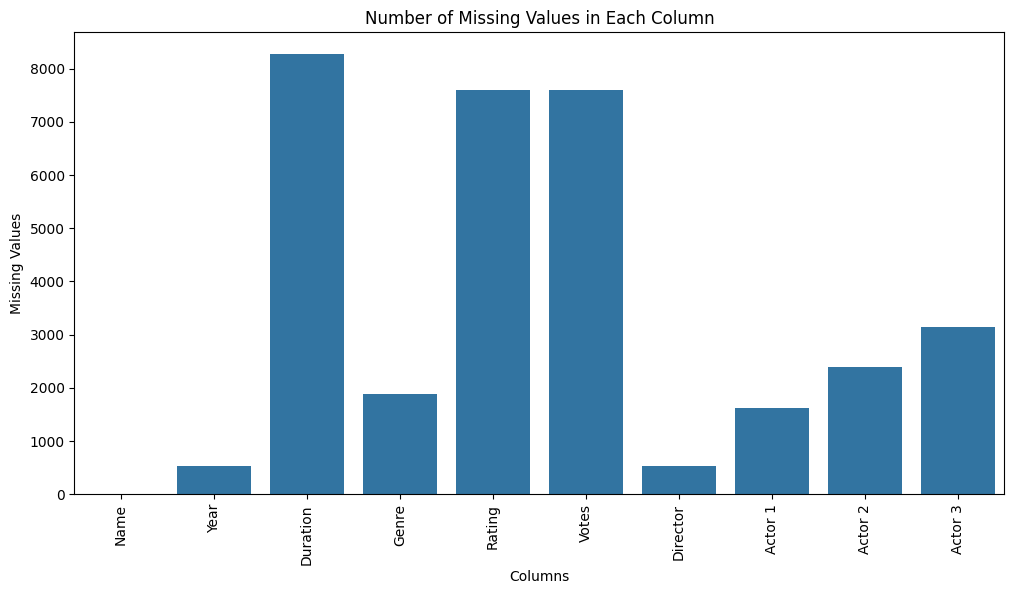

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Convert the Series to a DataFrame for plotting
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

# Plot using seaborn's barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='Missing Values', data=missing_values_df)
plt.xticks(rotation=90)  # Rotate column names for better visibility
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()


In [25]:


   
df['Rating'].fillna(df['Rating'].median())


0        6.0
1        7.0
2        6.0
3        4.4
4        6.0
        ... 
15504    4.6
15505    4.5
15506    6.0
15507    6.0
15508    6.2
Name: Rating, Length: 15509, dtype: float64

In [26]:

df = pd.read_csv(file_path, encoding='latin1')

# Check for and handle missing values in 'Rating'
if df['Rating'].isnull().sum() > 0:
    median_rating = df['Rating'].median()
    df['Rating'].fillna(median_rating, inplace=True)

# Select relevant features
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical variables
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps with model
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with preprocessing and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Predict ratings on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example usage to predict rating for a new movie
new_movie = pd.DataFrame([['Drama', 'James Cameron', 'Leonardo DiCaprio', 'Kate Winslet', 'Billy Zane']],
                         columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
rating_prediction = model.predict(new_movie)
print(f"Predicted rating for the new movie: {rating_prediction[0]}")


C:\Users\ACER\AppData\Local\Temp\ipykernel_22076\570764847.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Mean Squared Error: 3.4809199481490345
Predicted rating for the new movie: 5.997233130916109
